In [104]:
# Módulos 
# !pip install sounddevice
# import sounddevice as sd

import scipy.io.wavfile
import numpy as np
from scipy.signal import resample, spectrogram, correlate
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Grabar la vocal sostenida /a/ por unos 3 a 5 segundos. Tasa de muestro de 8Khz.
Se utilizó el módulo `sounddevice` de Python y su función `rec` para grabar la voz durante 4 segundos, usando una tasa de muestreo de 8KHz, y 1 canal. El audio grabado se encuentra disponible en el archivo `a.wav`. Luego, el archivo generado fue cargado en un ambiente de trabajo Python utilizando el método `read` del módulo `scipy.io.wavfile`, y transformando los datos a un arreglo de `numpy`, obteniéndose un arreglo con las amplitudes de la señal, de dimensión `(32000,)`. Se omiten los primeros 8.000 valores (primer segundo), por presentar valores alejados a los del resto de la señal, probablemente debido al ruido externo generado al comenzar a grabar.

In [23]:
# Variables
fs = 8000  # Sample rate
filename = 'aa.wav'
window_size = 20

In [17]:
# Lectura del archivo
sample_rate, pcm_data = scipy.io.wavfile.read(filename)

# Se pasa las amplitudes a numpy
amplitudes = np.array(pcm_data)
amp_trunc = amplitudes[8000:]
print(amplitudes.shape, amp_trunc.shape, sample_rate)

(32000,) (24000,) 8000


Text(0.5, 0, 'Tiempo (s)')

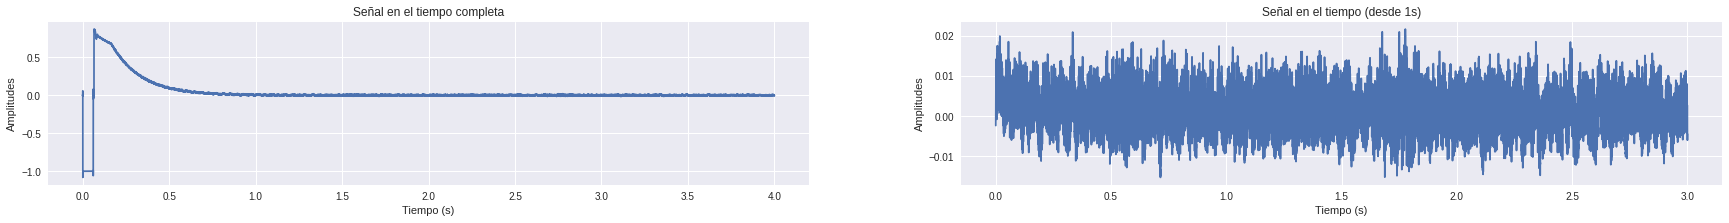

In [36]:
# Se grafica la señal

tiempos_tot = np.linspace(0, len(amplitudes) / fs, num=len(amplitudes))
tiempos_trunc = np.linspace(0, len(amp_trunc) / fs, num=len(amp_trunc))

plt.figure(figsize=(30, 3))

plt.subplot(1, 2, 1)
plt.plot(tiempos_tot, amplitudes)
plt.title("Señal en el tiempo completa")
plt.ylabel("Amplitudes")
plt.xlabel("Tiempo (s)")

plt.subplot(1, 2, 2)
plt.plot(tiempos_trunc, amp_trunc)
plt.title("Señal en el tiempo (desde 1s)")
plt.ylabel("Amplitudes")
plt.xlabel("Tiempo (s)")

# Estimar $T$ y $f_0=\frac{1}{T}$ a mano. Considere que es constante durante toda la señal.

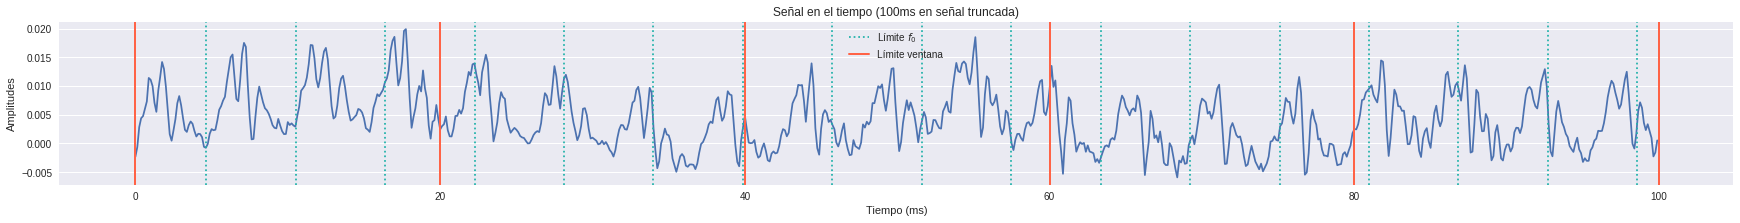

In [135]:
plt.figure(figsize=(30,3))
plt.plot(tiempos_trunc[:int(fs * (window_size * 5) / 1000)] * 1000, amp_trunc[: int(fs * (window_size * 5) / 1000)])
plt.title(f"Señal en el tiempo ({(window_size * 5)}ms en señal truncada)")

plt.axvline(0, ls="dotted", color="lightseagreen")
for i in range(0, 17):
    plt.axvline(4.65 + i * 5.87, ls="dotted", color="lightseagreen", label=r"Límite $f_0$" if i == 0 else None)
    
for i in range(0, 100 + window_size, window_size):
    plt.axvline(i, color="tomato", lw=2, label="Límite ventana" if i == 0 else None)

plt.legend()
plt.ylabel("Amplitudes")
plt.xlabel("Tiempo (ms)");

In [98]:
1 / 5.87

0.17035775127768313